Kira Silvestrovich, Applicant to Princeton Economics Pre-doc

Coding task

Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Write a function that calculates minimum and maximum distances between points

In [3]:
def get_distances(points: np.array) -> np.array:
    dist = np.zeros((points.shape[0], points.shape[0]))
    for i in range(points.shape[0]):
        for j in range(i + 1, points.shape[0]):
            dist[i, j] = np.sqrt(np.sum((points[i] - points[j]) ** 2))
    a, b = np.where(dist == min(dist[dist > 0]))
    c, d = np.where(dist == max(dist[dist > 0]))
    mins = points[np.array([a.item(), b.item()])]
    maxs = points[np.array([c.item(), d.item()])]
    min_value = min(dist[dist > 0])
    max_value = max(dist[dist > 0])
    return mins, maxs, min_value, max_value

Use a loop to make several iterations and write a code to make a scatter plot, also calculate average min and max distances

Let pair of coordinates (𝑋𝑖,𝑌𝑖) for 𝑖=1,2 be i.i.d. and have uniform distribution

In [9]:
def plot_pairs(pairs: int, repetitions: int):
    mins = np.array([])
    maxs = np.array([])
    min_values = np.array([])
    max_values = np.array([])
    for k in range(repetitions):
        points = np.random.uniform(0, 1, (pairs, 2))
        a, b, c, d = get_distances(points)
        mins = np.append(mins, a)
        maxs = np.append(maxs, b)
        min_values = np.append(min_values, c)
        max_values = np.append(max_values, d)
    mins = mins.reshape(repetitions, -1, 2)
    maxs = maxs.reshape(repetitions, -1, 2)
    fig = plt.figure(figsize = (12, 10))
    ax = plt.subplot(111)
    ax.scatter(mins[:, :, 0].reshape(-1), mins[:, :, 1].reshape(-1), color = 'blue', 
               label = 'Average Minimum Distance: {}'.format(np.round(min_values.mean(), 5)))
    ax.scatter(maxs[:, :, 0].reshape(-1), maxs[:, :, 1].reshape(-1), color = 'red',
               label = 'Average Maximum Distance: {}'.format(np.round(max_values.mean(), 5)))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Closest and Farthest Pairs in Unit Square')
    plt.show()

Plot n=10, 50 iterations

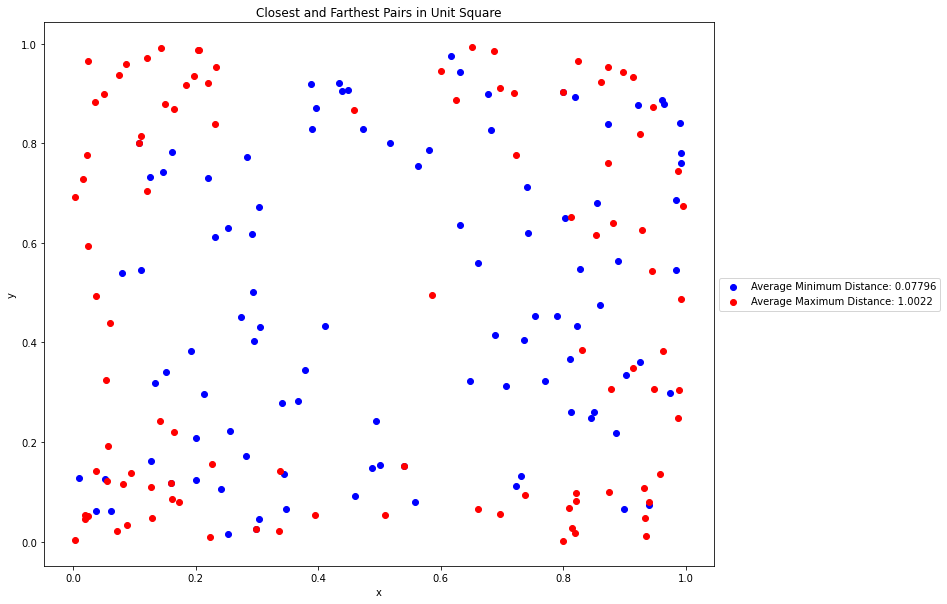

In [10]:
plot_pairs(10, 50)

Plot n=20, 50 iterations

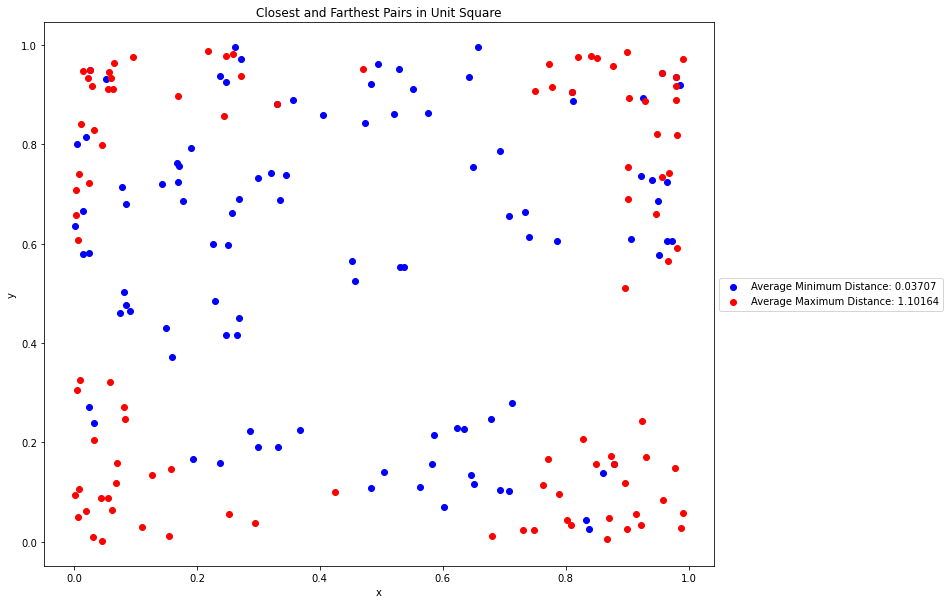

In [6]:
plot_pairs(20, 50)

Plot for n=1000 anf 50 iterations, measure how much time does it take to calculate it  

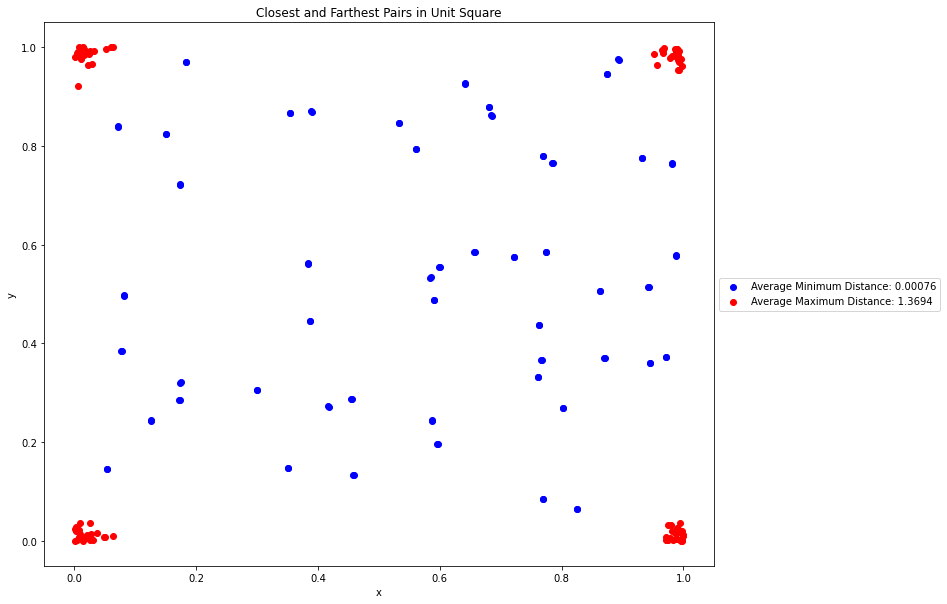

CPU times: user 2min 13s, sys: 286 ms, total: 2min 13s
Wall time: 2min 14s


In [7]:
%%time
plot_pairs(1000, 50)

We can notice that the points that form the pairs that give us the maximum distance are in the corners of the square, which is logical because the maximum distance is the diagonal. At the same time, the points that form the pairs that give us the minimum distance are next to each other. We can also notice that as the number of points increases, for the same number of iterations, the average minimum distance decreases and approaches zero, while the average maximum distance increases and approaches the root of 2.